# Exercice 1: Mesures de discrimination

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import tree

## 1.

In [2]:
def entropie_shannon(p):
    return - np.sum(p*np.log2(p))

In [3]:
def entropie_shannon_2_classes(p):
    return - p*np.log2(p) - (1-p)*np.log2(1-p)

In [4]:
def indice_gini(p):
    return 1 - np.sum(p**2)

In [5]:
def indice_gini_2_classes(p):
    return 2*p**2*(1-p)**2

In [6]:
def mesure_ambiguite_2_classes(p):
    epsilon = 1e-10
    return (((1-p)/p+epsilon)*np.log2(2) if p>(1-p) else (p/(1-p+epsilon))*np.log2(2))

/tmp/ipykernel_88779/1601517950.py:2: RuntimeWarning: divide by zero encountered in log2
  return - p*np.log2(p) - (1-p)*np.log2(1-p)
/tmp/ipykernel_88779/1601517950.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  return - p*np.log2(p) - (1-p)*np.log2(1-p)


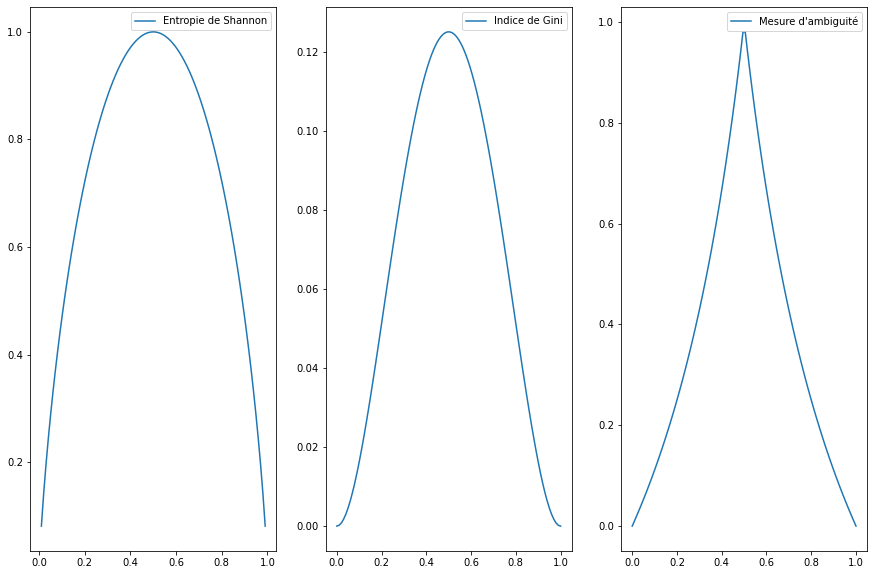

In [7]:
# Tests

p = np.linspace(0,1,100)

e_s = []
i_g = []
m_a = []

for pi in p:
    e_s.append(entropie_shannon_2_classes(pi))
    i_g.append(indice_gini_2_classes(pi))
    m_a.append(mesure_ambiguite_2_classes(pi))

plt.figure(figsize=(15,10))
plt.title('comparaison des mesures')
plt.subplot(1,3,1)
plt.plot(p,e_s,label='Entropie de Shannon')
plt.legend()
plt.subplot(1,3,2)
plt.plot(p,i_g,label='Indice de Gini')
plt.legend()
plt.subplot(1,3,3)
plt.plot(p,m_a,label='Mesure d\'ambiguité')
plt.legend()
plt.show()

## 2.

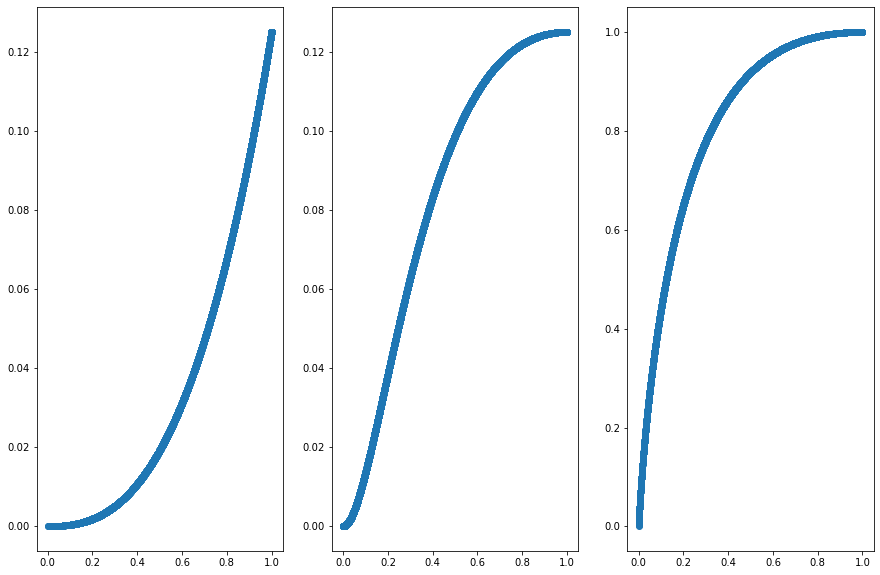

In [8]:
p = np.random.rand(10000)

e_s = []
i_g = []
m_a = [] 

for pi in p:
    e_s.append(entropie_shannon_2_classes(pi))
    i_g.append(indice_gini_2_classes(pi))
    m_a.append(mesure_ambiguite_2_classes(pi))

plt.figure(figsize=(15,10))
plt.legend("Comparaison entropies")
plt.subplot(1,3,1)
plt.scatter(e_s, i_g, label='Comparaison Shannon/Gini')
plt.subplot(1,3,2)
plt.scatter(m_a, i_g, label='Comparaison Mesure d ambiguite/Gini')
plt.subplot(1,3,3)
plt.scatter(m_a, e_s, label='Comparaison Mesure d ambiguite/Shannon')
plt.show()

## 3. 
On remarque que les mesures sont très corrélées car il n'y a pas de dispersion des points autour des courbes.

# Exercice 2: Arbres de d ́ecision en pr ́esence de donn ́ees symboliques

## 1.

In [9]:
from sklearn.datasets import load_digits
base_digits = load_digits()
print("Descriptions de la base digits:\n", base_digits.data)

Descriptions de la base digits:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [10]:
X = base_digits.data
Y = base_digits.target 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [11]:
print(base_digits.data.shape)
print(base_digits.target.shape)

(1797, 64)
(1797,)


Accuracy:  0.8638888888888889


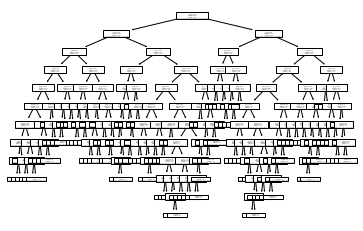

In [12]:
# declaration / initialisation d’un arbre
mon_arbre = tree.DecisionTreeClassifier(criterion='entropy')

# construction de l’arbre
mon_arbre.fit(X_train,Y_train)
# classification avec l’arbre construit
Y_pred = mon_arbre.predict(X_test)

# affichage arbre de décision
tree.plot_tree(mon_arbre)


accuracy = mon_arbre.score(X_test,Y_test)
print("Accuracy: ", accuracy)

## 2.

In [13]:
elections = pd.read_csv('data/elections.csv')
print(elections)

       Adresse Majeur? Nationalite  Label
0        Paris     oui    Francais      1
1        Paris     non    Francais     -1
2  Montpellier     oui     Italien      1
3        Paris     oui      Suisse     -1
4   Strasbourg     non     Italien     -1
5   Strasbourg     non    Francais     -1
6   Strasbourg     oui    Francais      1
7  Montpellier     oui      Suisse     -1


In [273]:
X = elections.iloc[:,:3]
Y = elections.iloc[:,-1]

print(X)
print(Y)

       Adresse Majeur? Nationalite
0        Paris     oui    Francais
1        Paris     non    Francais
2  Montpellier     oui     Italien
3        Paris     oui      Suisse
4   Strasbourg     non     Italien
5   Strasbourg     non    Francais
6   Strasbourg     oui    Francais
7  Montpellier     oui      Suisse
0    1
1   -1
2    1
3   -1
4   -1
5   -1
6    1
7   -1
Name: Label, dtype: int64


In [15]:
columns_to_encode = ['Adresse', 'Nationalite']

dataframe = pd.get_dummies(X, columns = columns_to_encode)

dataframe['Majeur?'] = dataframe['Majeur?'].replace({'oui':1, 'non':0})

C = dataframe.columns.tolist()
print(C)

dataframe

['Majeur?', 'Adresse_Montpellier', 'Adresse_Paris', 'Adresse_Strasbourg', 'Nationalite_Francais', 'Nationalite_Italien', 'Nationalite_Suisse']


,Majeur?,Adresse_Montpellier,Adresse_Paris,Adresse_Strasbourg,Nationalite_Francais,Nationalite_Italien,Nationalite_Suisse
0,1,0,1,0,1,0,0
1,0,0,1,0,1,0,0
2,1,1,0,0,0,1,0
3,1,0,1,0,0,0,1
4,0,0,0,1,0,1,0
5,0,0,0,1,1,0,0
6,1,0,0,1,1,0,0
7,1,1,0,0,0,0,1


[Text(0.4, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.5, 'x[6] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]')]

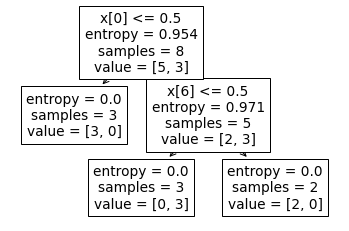

In [16]:
# declaration / initialisation d’un arbre
mon_arbre = tree.DecisionTreeClassifier(criterion='entropy')

# construction de l’arbre
mon_arbre.fit(dataframe,Y)

# affichage arbre de décision
tree.plot_tree(mon_arbre)

## 3.

**Classe Noeud**

In [327]:
class node():
    def __init__(self, feature_index=None, samples =None, children=None, classes=None,attribut=None, valeur_discrim=None, value=None):
        # si le noeud n'est pas une feuille
        self.feature_index = feature_index #indice de l'attribut choisi pour réaliser le split
        self.children = children  #liste sous arbre pour chaque enfant
        self.classes = classes # classes différente restante
        self.samples = samples # nombre d'echantillon dans le noeud
        self.valeur_discrim = valeur_discrim
        self.attribut = attribut
        
        # si le noeud est une feuille
        self.value = value

**Classe Arbre**

In [387]:
class DecisionTreeClassifierSymbolic():
    def __init__(self, eps=0.1,discrim ='shannon',min_sample_split =2, max_depth=4):
        self.root = None
        self.construction_arbre = True
        self.eps = eps
        self.discrim = discrim
        self.max_depth = max_depth
        self.min_sample_split = min_sample_split
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = pd.concat([X, Y], axis=1)
        self.root = self.build_tree(dataset)

        
    def build_tree(self, dataset, current_depth=0):
        X = dataset.iloc[:,:-1]
        Y = dataset.iloc[:,-1]
        num_samples, num_features = np.shape(X)
        
        critere = self.critere_arret(Y)
        
        
        if num_samples>=self.min_sample_split and current_depth<=self.max_depth and critere :
            best_attribut,valeur_discrim = self.get_best_attribut(X,Y)
            rep = self.repartition_classe(Y)
            liste_children=[]
            print('num_samples',num_samples,'current_depth',current_depth,'critere',critere,'best_attribut', best_attribut, 'repartition_calsse',rep)
            for i in np.unique(X.iloc[:,best_attribut]):
                data = dataset[dataset.iloc[:,best_attribut]==i]
                liste_children.append(self.build_tree(data, current_depth+1))
            return node(feature_index = best_attribut, 
                        children = liste_children, 
                        classes = rep, 
                        samples= len(X), 
                        attribut = np.unique(X.iloc[:,best_attribut]))
            
        leaf_value = self.calculate_leaf_value(Y)
        print(leaf_value, current_depth)
        return node(value=leaf_value)
    
    def critere_arret(self,Y):
        epsilon=10**-15
        p=self.proba_attribut(Y)
        h=0
        for p_i in p:
            h += p_i * np.log(p_i+epsilon)
        h = -h
        if h <= self.eps:
            return False
        else:
            return True
        

    def get_best_attribut(self,X,Y):
        ''' function to find the best split '''
        disc_cond_list = self.discrimination_conditionnelle_list(X,Y)
        print(disc_cond_list)
        best_attribut = np.argmin(disc_cond_list)
        valeur_discrim = np.min(disc_cond_list)
        return best_attribut, valeur_discrim


    def discrimination_conditionnelle_list(self,X,Y):
        ''' function to calculate the conditional entropy '''
        # pour tout les features
        liste_discrimination_cond =[]
        for i in range(X.shape[1]):
            liste_discrimination_cond.append(self.discrimination_conditionnelle(X.iloc[:,i], Y))
        return liste_discrimination_cond

    def discrimination_conditionnelle(self,X,Y):
        if self.discrim == 'shannon':
            return shannon(X,Y)
        if self.discrim == 'gini':
            return gini(X,Y)
        if self.discrim == 'ambiguite':
            return ambiguite(X,Y)

    def shannon(self,X,Y):
        eps = 10**-15
        attribut = X.name
        classe = Y.name
        data = pd.concat([X, Y], axis=1)
        entropie_cond=0
        dict_proba_classe = self.proba_attribut(Y)
        dict_proba = self.proba_attribut(X)
        # pour tout les attributs
        for j in dict_proba.keys():
            #pour chaque classe
            entropie_cond_class = 0
            for k in dict_proba_classe.keys():
                p = (data[attribut] == j) & (data[classe] == k)
                p = p.sum() / len(data)
                entropie_cond_class += -p * np.log(p+eps)
            entropie_cond += dict_proba[j] * entropie_cond_class
        return entropie_cond

    def gini(self,X,Y): #faire la normalisation pas le rapport de gain
        attribut = X.name
        classe = Y.name
        data = pd.concat([X, Y], axis=1)
        gini_cond=0
        dict_proba_classe = self.proba_attribut(Y)
        dict_proba = self.proba_attribut(X)
        # pour tout les attributs
        for j in dict_proba.keys():
            #pour chaque classe
            gini_cond_class = 0
            for k in dict_proba_classe.keys():
                p = (data[attribut] == j) & (data[classe] == k)
                p = p.sum() / len(data)
                gini_cond_class += p**2
            gini_cond += dict_proba[j] * (1 - gini_cond_class)
        return gini_cond

    def ambiguite(self,X,Y):
        eps = 10**-15
        attribut = X.name
        classe = Y.name
        data = pd.concat([X, Y], axis=1)
        ambiguite_cond=0
        dict_proba_classe = self.proba_attribut(Y)
        dict_proba = self.proba_attribut(X)
        # pour tout les attributs
        for j in dict_proba.keys():
            #pour chaque classe
            ambiguite =0
            liste_p =[]
            for k in dict_proba_classe.keys():
                p = (data[attribut] == j) & (data[classe] == k)
                p = p.sum() / len(data)
                liste_p.append(p)
            liste_ord = sorted(liste_p,reverse =True)
            pi_liste =[]
            for q in range(len(liste_ord)):
                pi_i = liste_ord[q]/liste_ord[0]
                pi_liste.append(pi_i)
            for q in range(1,len(pi_liste)):
                ambiguite += pi_liste[q] * (np.log(q+eps)-np.log(q-1+eps))
            ambiguite_cond += dict_proba[j] * ambiguite
        return ambiguite_cond


    def proba_attribut(self,X):
        ''' function to calculate the probability of each value of the attribute'''
        valeurs_uniques, occurrences = np.unique(X, return_counts=True)
        proba = occurrences/len(X)
        proba_dict = dict(zip(valeurs_uniques , proba))
        return  proba_dict 
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node value = class'''
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def repartition_classe(self,Y):
        valeurs_uniques_classes, occurrences_classes = np.unique(Y, return_counts=True)
        classes_dict = dict(zip(valeurs_uniques_classes , occurrences_classes))
        return classes_dict
    
    
    def predict(self, X):
        ''' function to predict new dataset '''
        preditions = [self.make_prediction(row, self.root) for index, row in X.iterrows()]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: 
            return tree.value
        feature_val = x.iloc[tree.feature_index]  
        for att in tree.attribut:
            if feature_val == att:
                print('True')
                print(tree.children[tree.feature_index].value)
                return self.make_prediction(x, tree.children[tree.feature_index])
            else:
                print('error')

In [388]:
dtcs = DecisionTreeClassifierSymbolic(max_depth =4)
dtcs.fit(X, Y)
dtcs.predict(X)

[0.5848429335974519, 0.5844194638043785, 0.5631820842049539]
num_samples 8 current_depth 0 critere True best_attribut 2 repartition_calsse {-1: 5, 1: 3}
[0.6931471805599433, 0.34657359027997164, 0.6931471805599433]
num_samples 4 current_depth 1 critere True best_attribut 1 repartition_calsse {-1: 2, 1: 2}
[0.34657359027997164, -1.110223024625156e-15, -1.110223024625156e-15]
num_samples 2 current_depth 2 critere True best_attribut 1 repartition_calsse {-1: 2}
[0.34657359027997164, -1.110223024625156e-15, -1.110223024625156e-15]
num_samples 2 current_depth 3 critere True best_attribut 1 repartition_calsse {-1: 2}
[0.34657359027997164, -1.110223024625156e-15, -1.110223024625156e-15]
num_samples 2 current_depth 4 critere True best_attribut 1 repartition_calsse {-1: 2}
-1 5
1 2
[0.34657359027997164, 0.34657359027997164, 0.6931471805599433]
num_samples 2 current_depth 1 critere True best_attribut 0 repartition_calsse {-1: 1, 1: 1}
1 2
-1 2
[0.34657359027997164, -1.110223024625156e-15, -1.110

/tmp/ipykernel_88779/2719920395.py:48: RuntimeWarning: invalid value encountered in log
  h += p_i * np.log(p_i+epsilon)
/tmp/ipykernel_88779/2719920395.py:48: RuntimeWarning: invalid value encountered in log
  h += p_i * np.log(p_i+epsilon)
/tmp/ipykernel_88779/2719920395.py:48: RuntimeWarning: invalid value encountered in log
  h += p_i * np.log(p_i+epsilon)
/tmp/ipykernel_88779/2719920395.py:48: RuntimeWarning: invalid value encountered in log
  h += p_i * np.log(p_i+epsilon)
/tmp/ipykernel_88779/2719920395.py:48: RuntimeWarning: invalid value encountered in log
  h += p_i * np.log(p_i+epsilon)
/tmp/ipykernel_88779/2719920395.py:48: RuntimeWarning: invalid value encountered in log
  h += p_i * np.log(p_i+epsilon)
/tmp/ipykernel_88779/2719920395.py:48: RuntimeWarning: invalid value encountered in log
  h += p_i * np.log(p_i+epsilon)
/tmp/ipykernel_88779/2719920395.py:48: RuntimeWarning: invalid value encountered in log
  h += p_i * np.log(p_i+epsilon)
/tmp/ipykernel_88779/2719920395.

IndexError: list index out of range

In [258]:
discrim ='shannon'
print(discrimination_conditionnelle(X.iloc[:,2],Y,'shannon'))

discrim ='gini'
print(discrimination_conditionnelle(X.iloc[:,2],Y,'gini'))

discrim ='ambiguite'
print(discrimination_conditionnelle(X.iloc[:,2],Y,'ambiguite'))


0.5631820842049539
0.9140625
25.904082296183013


In [261]:
get_best_attribut(X,Y,'gini')

[0.93359375, 0.8203125, 0.9140625]


(1, 0.8203125)